In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')

library("readxl")
library(tidyverse)
library(reshape2)

#reading in file
data <- read_excel("CytokineData_102920.xlsx", sheet = 2)
data_df = data.frame(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
head(data_df)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,E_C_F_002,IFNg,17.642316,4.220509,ELF,1,NS,NS_1
2,E_C_F_002,IL10,2.873724,1.953721,ELF,1,NS,NS_1
3,E_C_F_002,IL12p70,1.625272,1.392467,ELF,1,NS,NS_1
4,E_C_F_002,IL13,36.117692,5.214035,ELF,1,NS,NS_1
5,E_C_F_002,IL1b,104.409217,6.719857,ELF,1,NS,NS_1
6,E_C_F_002,IL6,21.159536,4.469856,ELF,1,NS,NS_1


In [22]:
#obtaining list of concentration values for each cytokine
get_Eotaxin_list = function(filename,compartment_type){
    Eotaxin_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'Eotaxin'){
                Eotaxin_concentration_list = c(Eotaxin_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(Eotaxin_concentration_list)
}
get_Eotaxin3_list = function(filename,compartment_type){
    Eotaxin3_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'Eotaxin3'){
                Eotaxin3_concentration_list = c(Eotaxin3_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(Eotaxin3_concentration_list)
}
get_Fractalkine_list = function(filename,compartment_type){
    Fractalkine_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'Fractalkine'){
                Fractalkine_concentration_list = c(Fractalkine_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(Fractalkine_concentration_list)
}
get_I309_list = function(filename,compartment_type){
    I309_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'I309'){
                I309_concentration_list = c(I309_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(I309_concentration_list)
}
get_IFNg_list = function(filename,compartment_type){
    IFNg_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IFNg'){
                IFNg_concentration_list = c(IFNg_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IFNg_concentration_list)
}
get_IL10_list = function(filename,compartment_type){
    IL10_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL10'){
                IL10_concentration_list = c(IL10_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL10_concentration_list)
}
get_IL12p70_list = function(filename,compartment_type){
    IL12p70_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL12p70'){
                IL12p70_concentration_list = c(IL12p70_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL12p70_concentration_list)
}
get_IL13_list = function(filename,compartment_type){
    IL13_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL13'){
                IL13_concentration_list = c(IL13_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL13_concentration_list)
}
get_IL17B_list = function(filename,compartment_type){
    IL17B_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL17B'){
                IL17B_concentration_list = c(IL17B_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL17B_concentration_list)
}
get_IL17D_list = function(filename,compartment_type){
    IL17D_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL17D'){
                IL17D_concentration_list = c(IL17D_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL17D_concentration_list)
}
get_IL1b_list = function(filename,compartment_type){
    IL1b_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL1b'){
                IL1b_concentration_list = c(IL1b_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL1b_concentration_list)
}
get_IL4_list = function(filename,compartment_type){
    IL4_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL4'){
                IL4_concentration_list = c(IL4_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL4_concentration_list)
}

get_IL6_list = function(filename,compartment_type){
    IL6_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL6'){
                IL6_concentration_list = c(IL6_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL6_concentration_list)
}
get_IL8_list = function(filename,compartment_type){
    IL8_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IL8'){
                IL8_concentration_list = c(IL8_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IL8_concentration_list)
}
get_IP10_list = function(filename,compartment_type){
    IP10_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'IP10'){
                IP10_concentration_list = c(IP10_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(IP10_concentration_list)
}
get_ITAC_list = function(filename,compartment_type){
    ITAC_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'ITAC'){
                ITAC_concentration_list = c(ITAC_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(ITAC_concentration_list)
}
get_MCP1_list = function(filename,compartment_type){
    MCP1_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'MCP1'){
                MCP1_concentration_list = c(MCP1_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(MCP1_concentration_list)
}
get_MIG_list = function(filename,compartment_type){
    MIG_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'MIG'){
                MIG_concentration_list = c(MIG_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(MIG_concentration_list)
}
get_MIP1a_list = function(filename,compartment_type){
    MIP1a_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'MIP1a'){
                MIP1a_concentration_list = c(MIP1a_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(MIP1a_concentration_list)
}
get_MIP1b_list = function(filename,compartment_type){
    MIP1b_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'MIP1b'){
                MIP1b_concentration_list = c(MIP1b_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(MIP1b_concentration_list)
}
get_TARC_list = function(filename,compartment_type){
    TARC_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'TARC'){
                TARC_concentration_list = c(TARC_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(TARC_concentration_list)
}
get_TNFa_list = function(filename,compartment_type){
    TNFa_concentration_list = c()
    for (i in 1:length(filename$Compartment)){
        if (filename$Compartment[i] == compartment_type & filename$Group[i] == 'NS'){
            if (filename$Protein[i] == 'TNFa'){
                TNFa_concentration_list = c(TNFa_concentration_list, filename$Conc_pslog2[i])
            }
        }
    }
    return(TNFa_concentration_list)
}

In [23]:
#calling all concentration list functions
Eotaxin_concentration_list_NLF = get_Eotaxin_list(data_df,'NLF')
Eotaxin3_concentration_list_NLF = get_Eotaxin3_list(data_df,'NLF')
Fractalkine_concentration_list_NLF = get_Fractalkine_list(data_df,'NLF')
I309_concentration_list_NLF = get_I309_list(data_df,'NLF')
IFNg_concentration_list_NLF = get_IFNg_list(data_df,'NLF')
IL10_concentration_list_NLF = get_IL10_list(data_df,'NLF')
IL12p70_concentration_list_NLF = get_IL12p70_list(data_df,'NLF')
IL13_concentration_list_NLF = get_IL13_list(data_df,'NLF')
IL17B_concentration_list_NLF = get_IL17B_list(data_df,'NLF')
IL17D_concentration_list_NLF = get_IL17D_list(data_df,'NLF')
IL1b_concentration_list_NLF = get_IL1b_list(data_df,'NLF')
IL4_concentration_list_NLF = get_IL4_list(data_df,'NLF')
IL6_concentration_list_NLF = get_IL6_list(data_df,'NLF')
IL8_concentration_list_NLF = get_IL8_list(data_df,'NLF')
IP10_concentration_list_NLF = get_IP10_list(data_df,'NLF')
ITAC_concentration_list_NLF = get_ITAC_list(data_df,'NLF')
MCP1_concentration_list_NLF = get_MCP1_list(data_df,'NLF')
MIG_concentration_list_NLF = get_MIG_list(data_df,'NLF')
MIP1a_concentration_list_NLF = get_MIP1a_list(data_df,'NLF')
MIP1b_concentration_list_NLF = get_MIP1b_list(data_df,'NLF')
TARC_concentration_list_NLF = get_TARC_list(data_df,'NLF')
TNFa_concentration_list_NLF = get_TNFa_list(data_df,'NLF')  

Eotaxin_concentration_list_ELF = get_Eotaxin_list(data_df,'ELF')
Eotaxin3_concentration_list_ELF = get_Eotaxin3_list(data_df,'ELF')
Fractalkine_concentration_list_ELF = get_Fractalkine_list(data_df,'ELF')
I309_concentration_list_ELF = get_I309_list(data_df,'ELF')
IFNg_concentration_list_ELF = get_IFNg_list(data_df,'ELF')
IL10_concentration_list_ELF = get_IL10_list(data_df,'ELF')
IL12p70_concentration_list_ELF = get_IL12p70_list(data_df,'ELF')
IL13_concentration_list_ELF = get_IL13_list(data_df,'ELF')
IL17B_concentration_list_ELF = get_IL17B_list(data_df,'ELF')
IL17D_concentration_list_ELF = get_IL17D_list(data_df,'ELF')
IL1b_concentration_list_ELF = get_IL1b_list(data_df,'ELF')
IL4_concentration_list_ELF = get_IL4_list(data_df,'ELF')
IL6_concentration_list_ELF = get_IL6_list(data_df,'ELF')
IL8_concentration_list_ELF = get_IL8_list(data_df,'ELF')
IP10_concentration_list_ELF = get_IP10_list(data_df,'ELF')
ITAC_concentration_list_ELF = get_ITAC_list(data_df,'ELF')
MCP1_concentration_list_ELF = get_MCP1_list(data_df,'ELF')
MIG_concentration_list_ELF = get_MIG_list(data_df,'ELF')
MIP1a_concentration_list_ELF = get_MIP1a_list(data_df,'ELF')
MIP1b_concentration_list_ELF = get_MIP1b_list(data_df,'ELF')
TARC_concentration_list_ELF = get_TARC_list(data_df,'ELF')
TNFa_concentration_list_ELF = get_TNFa_list(data_df,'ELF')  

Eotaxin_concentration_list_Sputum = get_Eotaxin_list(data_df,'Sputum')
Eotaxin3_concentration_list_Sputum = get_Eotaxin3_list(data_df,'Sputum')
Fractalkine_concentration_list_Sputum = get_Fractalkine_list(data_df,'Sputum')
I309_concentration_list_Sputum = get_I309_list(data_df,'Sputum')
IFNg_concentration_list_Sputum = get_IFNg_list(data_df,'Sputum')
IL10_concentration_list_Sputum = get_IL10_list(data_df,'Sputum')
IL12p70_concentration_list_Sputum = get_IL12p70_list(data_df,'Sputum')
IL13_concentration_list_Sputum = get_IL13_list(data_df,'Sputum')
IL17B_concentration_list_Sputum = get_IL17B_list(data_df,'Sputum')
IL17D_concentration_list_Sputum = get_IL17D_list(data_df,'Sputum')
IL1b_concentration_list_Sputum = get_IL1b_list(data_df,'Sputum')
IL4_concentration_list_Sputum = get_IL4_list(data_df,'Sputum')
IL6_concentration_list_Sputum = get_IL6_list(data_df,'Sputum')
IL8_concentration_list_Sputum = get_IL8_list(data_df,'Sputum')
IP10_concentration_list_Sputum = get_IP10_list(data_df,'Sputum')
ITAC_concentration_list_Sputum = get_ITAC_list(data_df,'Sputum')
MCP1_concentration_list_Sputum = get_MCP1_list(data_df,'Sputum')
MIG_concentration_list_Sputum = get_MIG_list(data_df,'Sputum')
MIP1a_concentration_list_Sputum = get_MIP1a_list(data_df,'Sputum')
MIP1b_concentration_list_Sputum = get_MIP1b_list(data_df,'Sputum')
TARC_concentration_list_Sputum = get_TARC_list(data_df,'Sputum')
TNFa_concentration_list_Sputum = get_TNFa_list(data_df,'Sputum')  

Eotaxin_concentration_list_Serum = get_Eotaxin_list(data_df,'Serum')
Eotaxin3_concentration_list_Serum = get_Eotaxin3_list(data_df,'Serum')
Fractalkine_concentration_list_Serum = get_Fractalkine_list(data_df,'Serum')
I309_concentration_list_Serum = get_I309_list(data_df,'Serum')
IFNg_concentration_list_Serum = get_IFNg_list(data_df,'Serum')
IL10_concentration_list_Serum = get_IL10_list(data_df,'Serum')
IL12p70_concentration_list_Serum = get_IL12p70_list(data_df,'Serum')
IL13_concentration_list_Serum = get_IL13_list(data_df,'Serum')
IL17B_concentration_list_Serum = get_IL17B_list(data_df,'Serum')
IL17D_concentration_list_Serum = get_IL17D_list(data_df,'Serum')
IL1b_concentration_list_Serum = get_IL1b_list(data_df,'Serum')
IL4_concentration_list_Serum = get_IL4_list(data_df,'Serum')
IL6_concentration_list_Serum = get_IL6_list(data_df,'Serum')
IL8_concentration_list_Serum = get_IL8_list(data_df,'Serum')
IP10_concentration_list_Serum = get_IP10_list(data_df,'Serum')
ITAC_concentration_list_Serum = get_ITAC_list(data_df,'Serum')
MCP1_concentration_list_Serum = get_MCP1_list(data_df,'Serum')
MIG_concentration_list_Serum = get_MIG_list(data_df,'Serum')
MIP1a_concentration_list_Serum = get_MIP1a_list(data_df,'Serum')
MIP1b_concentration_list_Serum = get_MIP1b_list(data_df,'Serum')
TARC_concentration_list_Serum = get_TARC_list(data_df,'Serum')
TNFa_concentration_list_Serum = get_TNFa_list(data_df,'Serum')  

In [24]:
get_mean_sd = function(conc_list){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (mean and sd)

    #"""
    mean = mean(conc_list)
    standard_deviation = sd(conc_list)
    
    mean_sd_tuple = c(mean,standard_deviation)  #putting into a vector to return both
    return(mean_sd_tuple)
}

#calling standard deviation function 
Eotaxin_mean_sd_NLF = get_mean_sd(Eotaxin_concentration_list_NLF)
Eotaxin3_mean_sd_NLF = get_mean_sd(Eotaxin3_concentration_list_NLF)
Fractalkine_mean_sd_NLF = get_mean_sd(Fractalkine_concentration_list_NLF)
I309_mean_sd_NLF = get_mean_sd(I309_concentration_list_NLF)
IFNg_mean_sd_NLF = get_mean_sd(IFNg_concentration_list_NLF)
IL10_mean_sd_NLF = get_mean_sd(IL10_concentration_list_NLF)
IL12p70_mean_sd_NLF = get_mean_sd(IL12p70_concentration_list_NLF)
IL13_mean_sd_NLF = get_mean_sd(IL13_concentration_list_NLF)
IL17B_mean_sd_NLF = get_mean_sd(IL17B_concentration_list_NLF)
IL17D_mean_sd_NLF = get_mean_sd(IL17D_concentration_list_NLF)
IL1b_mean_sd_NLF = get_mean_sd(IL1b_concentration_list_NLF)
IL4_mean_sd_NLF = get_mean_sd(IL4_concentration_list_NLF)
IL6_mean_sd_NLF = get_mean_sd(IL6_concentration_list_NLF)
IL8_mean_sd_NLF = get_mean_sd(IL8_concentration_list_NLF)
IP10_mean_sd_NLF = get_mean_sd(IP10_concentration_list_NLF)
ITAC_mean_sd_NLF = get_mean_sd(ITAC_concentration_list_NLF)
MCP1_mean_sd_NLF = get_mean_sd(MCP1_concentration_list_NLF)
MIG_mean_sd_NLF = get_mean_sd(MIG_concentration_list_NLF)
MIP1a_mean_sd_NLF = get_mean_sd(MIP1a_concentration_list_NLF)
MIP1b_mean_sd_NLF = get_mean_sd(MIP1b_concentration_list_NLF)
TARC_mean_sd_NLF = get_mean_sd(TARC_concentration_list_NLF)
TNFa_mean_sd_NLF = get_mean_sd(TNFa_concentration_list_NLF)  

Eotaxin_mean_sd_ELF = get_mean_sd(Eotaxin_concentration_list_ELF)
Eotaxin3_mean_sd_ELF = get_mean_sd(Eotaxin3_concentration_list_ELF)
Fractalkine_mean_sd_ELF = get_mean_sd(Fractalkine_concentration_list_ELF)
I309_mean_sd_ELF = get_mean_sd(I309_concentration_list_ELF)
IFNg_mean_sd_ELF = get_mean_sd(IFNg_concentration_list_ELF)
IL10_mean_sd_ELF = get_mean_sd(IL10_concentration_list_ELF)
IL12p70_mean_sd_ELF = get_mean_sd(IL12p70_concentration_list_ELF)
IL13_mean_sd_ELF = get_mean_sd(IL13_concentration_list_ELF)
IL17B_mean_sd_ELF = get_mean_sd(IL17B_concentration_list_ELF)
IL17D_mean_sd_ELF = get_mean_sd(IL17D_concentration_list_ELF)
IL1b_mean_sd_ELF = get_mean_sd(IL1b_concentration_list_ELF)
IL4_mean_sd_ELF = get_mean_sd(IL4_concentration_list_ELF)
IL6_mean_sd_ELF = get_mean_sd(IL6_concentration_list_ELF)
IL8_mean_sd_ELF = get_mean_sd(IL8_concentration_list_ELF)
IP10_mean_sd_ELF = get_mean_sd(IP10_concentration_list_ELF)
ITAC_mean_sd_ELF = get_mean_sd(ITAC_concentration_list_ELF)
MCP1_mean_sd_ELF = get_mean_sd(MCP1_concentration_list_ELF)
MIG_mean_sd_ELF = get_mean_sd(MIG_concentration_list_ELF)
MIP1a_mean_sd_ELF = get_mean_sd(MIP1a_concentration_list_ELF)
MIP1b_mean_sd_ELF = get_mean_sd(MIP1b_concentration_list_ELF)
TARC_mean_sd_ELF = get_mean_sd(TARC_concentration_list_ELF)
TNFa_mean_sd_ELF = get_mean_sd(TNFa_concentration_list_ELF)  

Eotaxin_mean_sd_Sputum = get_mean_sd(Eotaxin_concentration_list_Sputum)
Eotaxin3_mean_sd_Sputum = get_mean_sd(Eotaxin3_concentration_list_Sputum)
Fractalkine_mean_sd_Sputum = get_mean_sd(Fractalkine_concentration_list_Sputum)
I309_mean_sd_Sputum = get_mean_sd(I309_concentration_list_Sputum)
IFNg_mean_sd_Sputum = get_mean_sd(IFNg_concentration_list_Sputum)
IL10_mean_sd_Sputum = get_mean_sd(IL10_concentration_list_Sputum)
IL12p70_mean_sd_Sputum = get_mean_sd(IL12p70_concentration_list_Sputum)
IL13_mean_sd_Sputum = get_mean_sd(IL13_concentration_list_Sputum)
IL17B_mean_sd_Sputum = get_mean_sd(IL17B_concentration_list_Sputum)
IL17D_mean_sd_Sputum = get_mean_sd(IL17D_concentration_list_Sputum)
IL1b_mean_sd_Sputum = get_mean_sd(IL1b_concentration_list_Sputum)
IL4_mean_sd_Sputum = get_mean_sd(IL4_concentration_list_Sputum)
IL6_mean_sd_Sputum = get_mean_sd(IL6_concentration_list_Sputum)
IL8_mean_sd_Sputum = get_mean_sd(IL8_concentration_list_Sputum)
IP10_mean_sd_Sputum = get_mean_sd(IP10_concentration_list_Sputum)
ITAC_mean_sd_Sputum = get_mean_sd(ITAC_concentration_list_Sputum)
MCP1_mean_sd_Sputum = get_mean_sd(MCP1_concentration_list_Sputum)
MIG_mean_sd_Sputum = get_mean_sd(MIG_concentration_list_Sputum)
MIP1a_mean_sd_Sputum = get_mean_sd(MIP1a_concentration_list_Sputum)
MIP1b_mean_sd_Sputum = get_mean_sd(MIP1b_concentration_list_Sputum)
TARC_mean_sd_Sputum = get_mean_sd(TARC_concentration_list_Sputum)
TNFa_mean_sd_Sputum = get_mean_sd(TNFa_concentration_list_Sputum)  

Eotaxin_mean_sd_Serum = get_mean_sd(Eotaxin_concentration_list_Serum)
Eotaxin3_mean_sd_Serum = get_mean_sd(Eotaxin3_concentration_list_Serum)
Fractalkine_mean_sd_Serum = get_mean_sd(Fractalkine_concentration_list_Serum)
I309_mean_sd_Serum = get_mean_sd(I309_concentration_list_Serum)
IFNg_mean_sd_Serum = get_mean_sd(IFNg_concentration_list_Serum)
IL10_mean_sd_Serum = get_mean_sd(IL10_concentration_list_Serum)
IL12p70_mean_sd_Serum = get_mean_sd(IL12p70_concentration_list_Serum)
IL13_mean_sd_Serum = get_mean_sd(IL13_concentration_list_Serum)
IL17B_mean_sd_Serum = get_mean_sd(IL17B_concentration_list_Serum)
IL17D_mean_sd_Serum = get_mean_sd(IL17D_concentration_list_Serum)
IL1b_mean_sd_Serum = get_mean_sd(IL1b_concentration_list_Serum)
IL4_mean_sd_Serum = get_mean_sd(IL4_concentration_list_Serum)
IL6_mean_sd_Serum = get_mean_sd(IL6_concentration_list_Serum)
IL8_mean_sd_Serum = get_mean_sd(IL8_concentration_list_Serum)
IP10_mean_sd_Serum = get_mean_sd(IP10_concentration_list_Serum)
ITAC_mean_sd_Serum = get_mean_sd(ITAC_concentration_list_Serum)
MCP1_mean_sd_Serum = get_mean_sd(MCP1_concentration_list_Serum)
MIG_mean_sd_Serum = get_mean_sd(MIG_concentration_list_Serum)
MIP1a_mean_sd_Serum = get_mean_sd(MIP1a_concentration_list_Serum)
MIP1b_mean_sd_Serum = get_mean_sd(MIP1b_concentration_list_Serum)
TARC_mean_sd_Serum = get_mean_sd(TARC_concentration_list_Serum)
TNFa_mean_sd_Serum = get_mean_sd(TNFa_concentration_list_Serum)  

In [25]:
get_dataframe = function(Eotaxin_tuple, Eotaxin3_tuple, Fractalkine_tuple, I309_tuple, IFNg_tuple,IL10_tuple, 
                         IL12p70_tuple,IL13_tuple, IL17B_tuple, IL17D_tuple, IL1b_tuple,IL4_tuple, IL6_tuple, 
                         IL8_tuple, IP10_tuple, ITAC_tuple, MCP1_tuple,MIG_tuple, MIP1a_tuple, 
                         MIP1b_tuple, TARC_tuple, TNFa_tuple){
    #"""
    #Putting mean,sd tuples into a data frame based on compartment.

    #:param: 22 tuples from each cytokine
    #:output: a 22x2 data frame containing mean and sd for each cytokine. 
    #"""
    matrix_mean_sd_initial = cbind(Eotaxin_tuple, Eotaxin3_tuple, Fractalkine_tuple, I309_tuple, IFNg_tuple,
                          IL10_tuple, IL12p70_tuple,IL13_tuple, IL17B_tuple, IL17D_tuple, IL1b_tuple,
                          IL4_tuple, IL6_tuple, IL8_tuple, IP10_tuple, ITAC_tuple, MCP1_tuple,
                          MIG_tuple, MIP1a_tuple, MIP1b_tuple, TARC_tuple, TNFa_tuple)
    matrix_mean_sd = t(matrix_mean_sd_initial)
    rownames(matrix_mean_sd) = c('Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa')
    colnames(matrix_mean_sd) = c('mean', 'sd')

    mean_sd_df = data.frame(matrix_mean_sd)
    #descending_mean_sd_df = mean_sd_df[order(-mean_sd_df$mean),]
    return(mean_sd_df)
}
NLF_cytokines = get_dataframe(Eotaxin_mean_sd_NLF, Eotaxin3_mean_sd_NLF, Fractalkine_mean_sd_NLF, I309_mean_sd_NLF, 
                              IFNg_mean_sd_NLF,IL10_mean_sd_NLF, IL12p70_mean_sd_NLF,IL13_mean_sd_NLF, 
                              IL17B_mean_sd_NLF, IL17D_mean_sd_NLF, IL1b_mean_sd_NLF,IL4_mean_sd_NLF, 
                              IL6_mean_sd_NLF, IL8_mean_sd_NLF, IP10_mean_sd_NLF, ITAC_mean_sd_NLF, 
                              MCP1_mean_sd_NLF,MIG_mean_sd_NLF, MIP1a_mean_sd_NLF, MIP1b_mean_sd_NLF, 
                              TARC_mean_sd_NLF, TNFa_mean_sd_NLF)
ELF_cytokines = get_dataframe(Eotaxin_mean_sd_ELF, Eotaxin3_mean_sd_ELF, Fractalkine_mean_sd_ELF, I309_mean_sd_ELF, 
                              IFNg_mean_sd_ELF,IL10_mean_sd_ELF, IL12p70_mean_sd_ELF,IL13_mean_sd_ELF, 
                              IL17B_mean_sd_ELF, IL17D_mean_sd_ELF, IL1b_mean_sd_ELF,IL4_mean_sd_ELF, 
                              IL6_mean_sd_ELF, IL8_mean_sd_ELF, IP10_mean_sd_ELF, ITAC_mean_sd_ELF, 
                              MCP1_mean_sd_ELF,MIG_mean_sd_ELF, MIP1a_mean_sd_ELF, MIP1b_mean_sd_ELF, 
                              TARC_mean_sd_ELF, TNFa_mean_sd_ELF)
Sputum_cytokines = get_dataframe(Eotaxin_mean_sd_Sputum, Eotaxin3_mean_sd_Sputum, Fractalkine_mean_sd_Sputum, I309_mean_sd_Sputum, 
                              IFNg_mean_sd_Sputum,IL10_mean_sd_Sputum, IL12p70_mean_sd_Sputum,IL13_mean_sd_Sputum, 
                              IL17B_mean_sd_Sputum, IL17D_mean_sd_Sputum, IL1b_mean_sd_Sputum,IL4_mean_sd_Sputum, 
                              IL6_mean_sd_Sputum, IL8_mean_sd_Sputum, IP10_mean_sd_Sputum, ITAC_mean_sd_Sputum, 
                              MCP1_mean_sd_Sputum,MIG_mean_sd_Sputum, MIP1a_mean_sd_Sputum, MIP1b_mean_sd_Sputum, 
                              TARC_mean_sd_Sputum, TNFa_mean_sd_Sputum)
Serum_cytokines = get_dataframe(Eotaxin_mean_sd_Serum, Eotaxin3_mean_sd_Serum, Fractalkine_mean_sd_Serum, I309_mean_sd_Serum, 
                              IFNg_mean_sd_Serum,IL10_mean_sd_Serum, IL12p70_mean_sd_Serum,IL13_mean_sd_Serum, 
                              IL17B_mean_sd_Serum, IL17D_mean_sd_Serum, IL1b_mean_sd_Serum,IL4_mean_sd_Serum, 
                              IL6_mean_sd_Serum, IL8_mean_sd_Serum, IP10_mean_sd_Serum, ITAC_mean_sd_Serum, 
                              MCP1_mean_sd_Serum,MIG_mean_sd_Serum, MIP1a_mean_sd_Serum, MIP1b_mean_sd_Serum, 
                              TARC_mean_sd_Serum, TNFa_mean_sd_Serum)

In [26]:
add_compartment = function(dataframe, compartment_name){
    #"""
    #Takes the dataframes already made from above and adds a column specifying the compartment.

    #:param: compartment dataframe and compartment name
    #:output: a 22x3 matrix containing mean, sd, and compartment for each cytokine. 
    #"""
    compartment = rep(compartment_name, times = length(dataframe$mean))
    combined_df = cbind(dataframe,compartment)
    return(combined_df)
}
NLF_df = add_compartment(NLF_cytokines,'NLF')
ELF_df = add_compartment(ELF_cytokines, 'ELF')
Sputum_df = add_compartment(Sputum_cytokines, 'Sputum')
Serum_df = add_compartment(Serum_cytokines, 'Serum')

In [27]:
#making one df of all melted baseline values
baseline_df = data.frame(cbind(c(NLF_df[,1],ELF_df[,1],Sputum_df[,1],Serum_df[,1]), c(NLF_df[,2],ELF_df[,2],Sputum_df[,2],Serum_df[,2]),c(NLF_df[,3],ELF_df[,3],Sputum_df[,3],Serum_df[,3]), c('Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa', 'Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa','Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa','Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa')))
colnames(baseline_df) = c('mean','sd','compartment','cytokine')
baseline_df$mean = as.numeric(baseline_df$mean)
baseline_df$sd = as.numeric(baseline_df$sd)

# Figure 1a

Plotting averages and standard deviations of baseline concentration values by compartment.

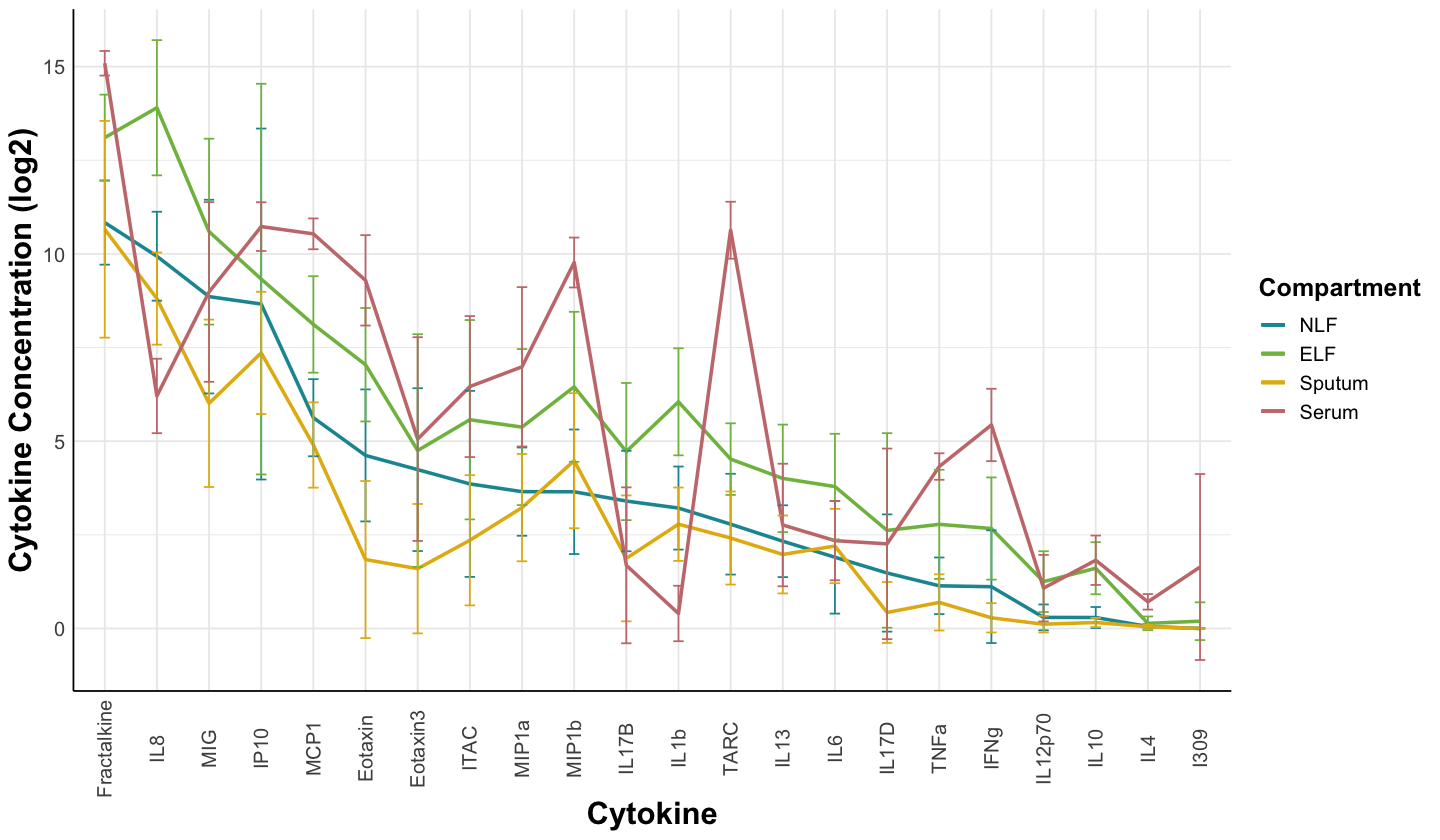

In [28]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
cytokines = row.names(NLF_df)
Figure1 = ggplot() +
  geom_line(data = NLF_df, aes(x = reorder(cytokines, -mean), y = mean, group = 1, color = compartment), size = 1) +
  geom_line(data = ELF_df, aes(x = reorder(cytokines, -mean), y = mean, group = 2, color = compartment), size = 1) +
  geom_line(data = Sputum_df, aes(x = reorder(cytokines, -mean), y = mean, group = 3, color = compartment), size = 1) +
  geom_line(data = Serum_df, aes(x = reorder(cytokines, -mean), y = mean, group = 4, color = compartment), size = 1) +
 
  #adding error bars
  geom_errorbar(data = NLF_df, aes(x = reorder(cytokines, -mean), y = mean, ymin = mean - sd, ymax = mean + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = ELF_df, aes(x = reorder(cytokines, -mean), y = mean, ymin = mean - sd, ymax = mean + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = Sputum_df, aes(x = reorder(cytokines, -mean), y = mean, ymin = mean - sd, ymax = mean + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = Serum_df, aes(x = reorder(cytokines, -mean), y = mean, ymin = mean - sd, ymax = mean + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +

  theme_minimal() + 

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12),
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face="bold", size = 15),
        legend.text = element_text(size = 12))+ #changes legend title
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 

  labs(color = "Compartment") +#legend name  
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c'),
                      breaks = c('NLF','ELF','Sputum','Serum'))  #reordering

Figure1

In [29]:
ggsave(Figure1, 
       filename = 'Figure1.pdf',
       path = Output,
       width = 12, height = 7)

# Figure 1b

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



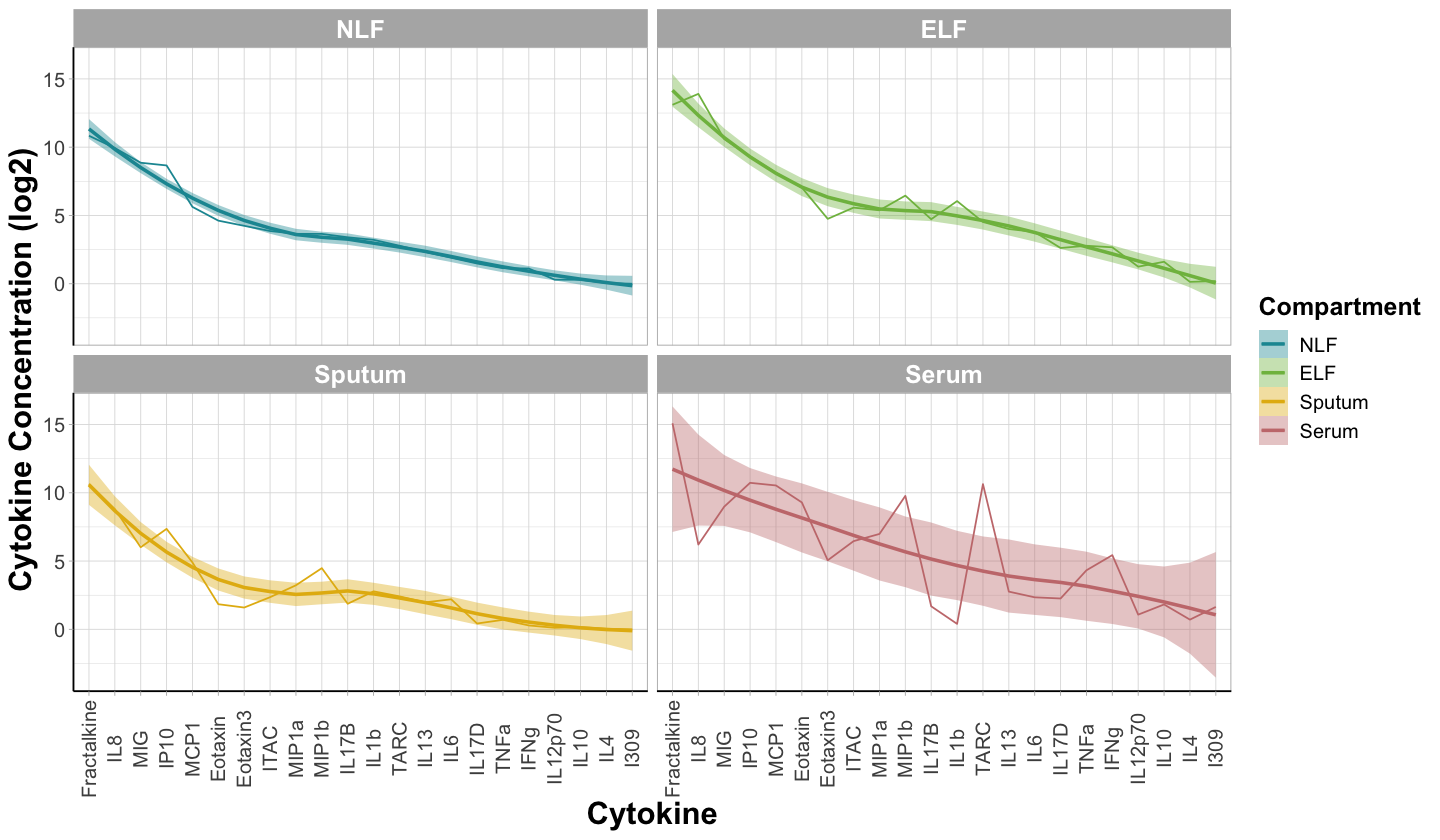

In [30]:
options(repr.plot.width=12, repr.plot.height=7) #changing size
descending_cytokines = row.names(NLF_df[order(-NLF_df$mean),])
cytokines = factor(baseline_df$cytokine, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 
Figure1b = ggplot(transform(baseline_df, compartment = factor(compartment, levels = c('NLF','ELF','Sputum','Serum')))) + 
  geom_line(aes(x = cytokines, y = as.numeric(mean), group = 1,color = compartment)) +
  geom_smooth(aes(x = cytokines, y = as.numeric(mean), group = compartment, color = compartment, fill = compartment)) +
  
  facet_wrap(~ compartment) + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) +
  scale_fill_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) 
Figure1b

In [31]:
ggsave(Figure1b, 
       filename = 'Figure1b.pdf',
       path = Output,
       width = 12, height = 7)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



Same plot as Figure 1a plotting mean and standard deviation of baseline values, but made separate plots for each compartment.

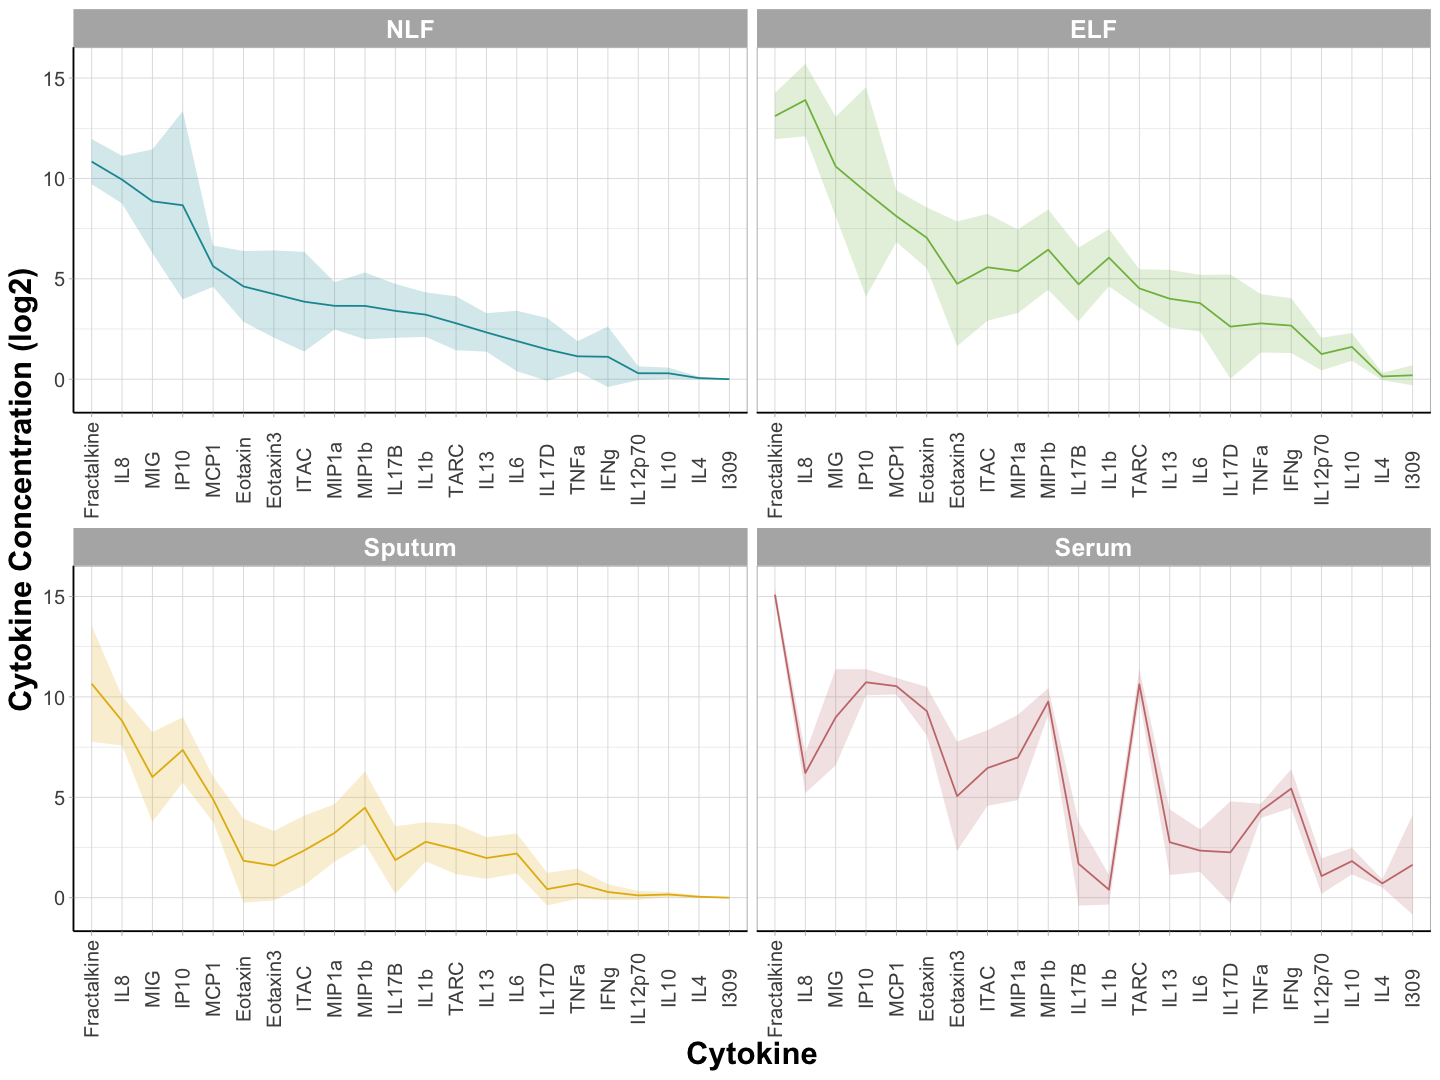

In [38]:
options(repr.plot.width=12, repr.plot.height=9) #changing size
descending_cytokines = row.names(NLF_df[order(-NLF_df$mean),])
cytokines = factor(baseline_df$cytokine, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 
Figure_1bV2 = ggplot(transform(baseline_df, compartment = factor(compartment, levels = c('NLF','ELF','Sputum','Serum')))) + 
  geom_line(aes(x = cytokines, y = as.numeric(mean), group = 1,color = compartment)) +
  geom_ribbon(aes(x = cytokines, y = mean, ymin = mean - sd, ymax = mean + sd, group = 1, fill = compartment), alpha = 0.2) +
  
  facet_wrap(~ compartment, scales = 'free_x') + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        #legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.position = "none", #removing legend
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) +
  scale_fill_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) 
Figure_1bV2

In [39]:
ggsave(Figure_1bV2, 
       filename = 'Figure1bV2.pdf',
       path = Output,
       width = 12, height = 9)

# Exploring other ways to show the distribution of the data. 

In [13]:
get_baseline_conc = function(compartment){
    baseline_subset = subset(data_df, data_df$Compartment == compartment & data_df$Group == 'NS', 
                             select = c(Protein, Compartment,Conc_pslog2, Group))
}

NLF_baseline = get_baseline_conc('NLF')
ELF_baseline = get_baseline_conc('ELF')
Sputum_baseline = get_baseline_conc('Sputum')
Serum_baseline = get_baseline_conc('Serum')

baseline_df1a = rbind(NLF_baseline,ELF_baseline,Sputum_baseline,Serum_baseline)

In [14]:
head(baseline_df1a)

,Protein,Compartment,Conc_pslog2,Group
,<chr>,<chr>,<dbl>,<chr>
45,IFNg,NLF,0.2638601,NS
46,IL10,NLF,0.1734701,NS
47,IL12p70,NLF,0.0000000,NS
48,IL13,NLF,2.9429605,NS
49,IL1b,NLF,4.3961852,NS
50,IL6,NLF,1.2804834,NS


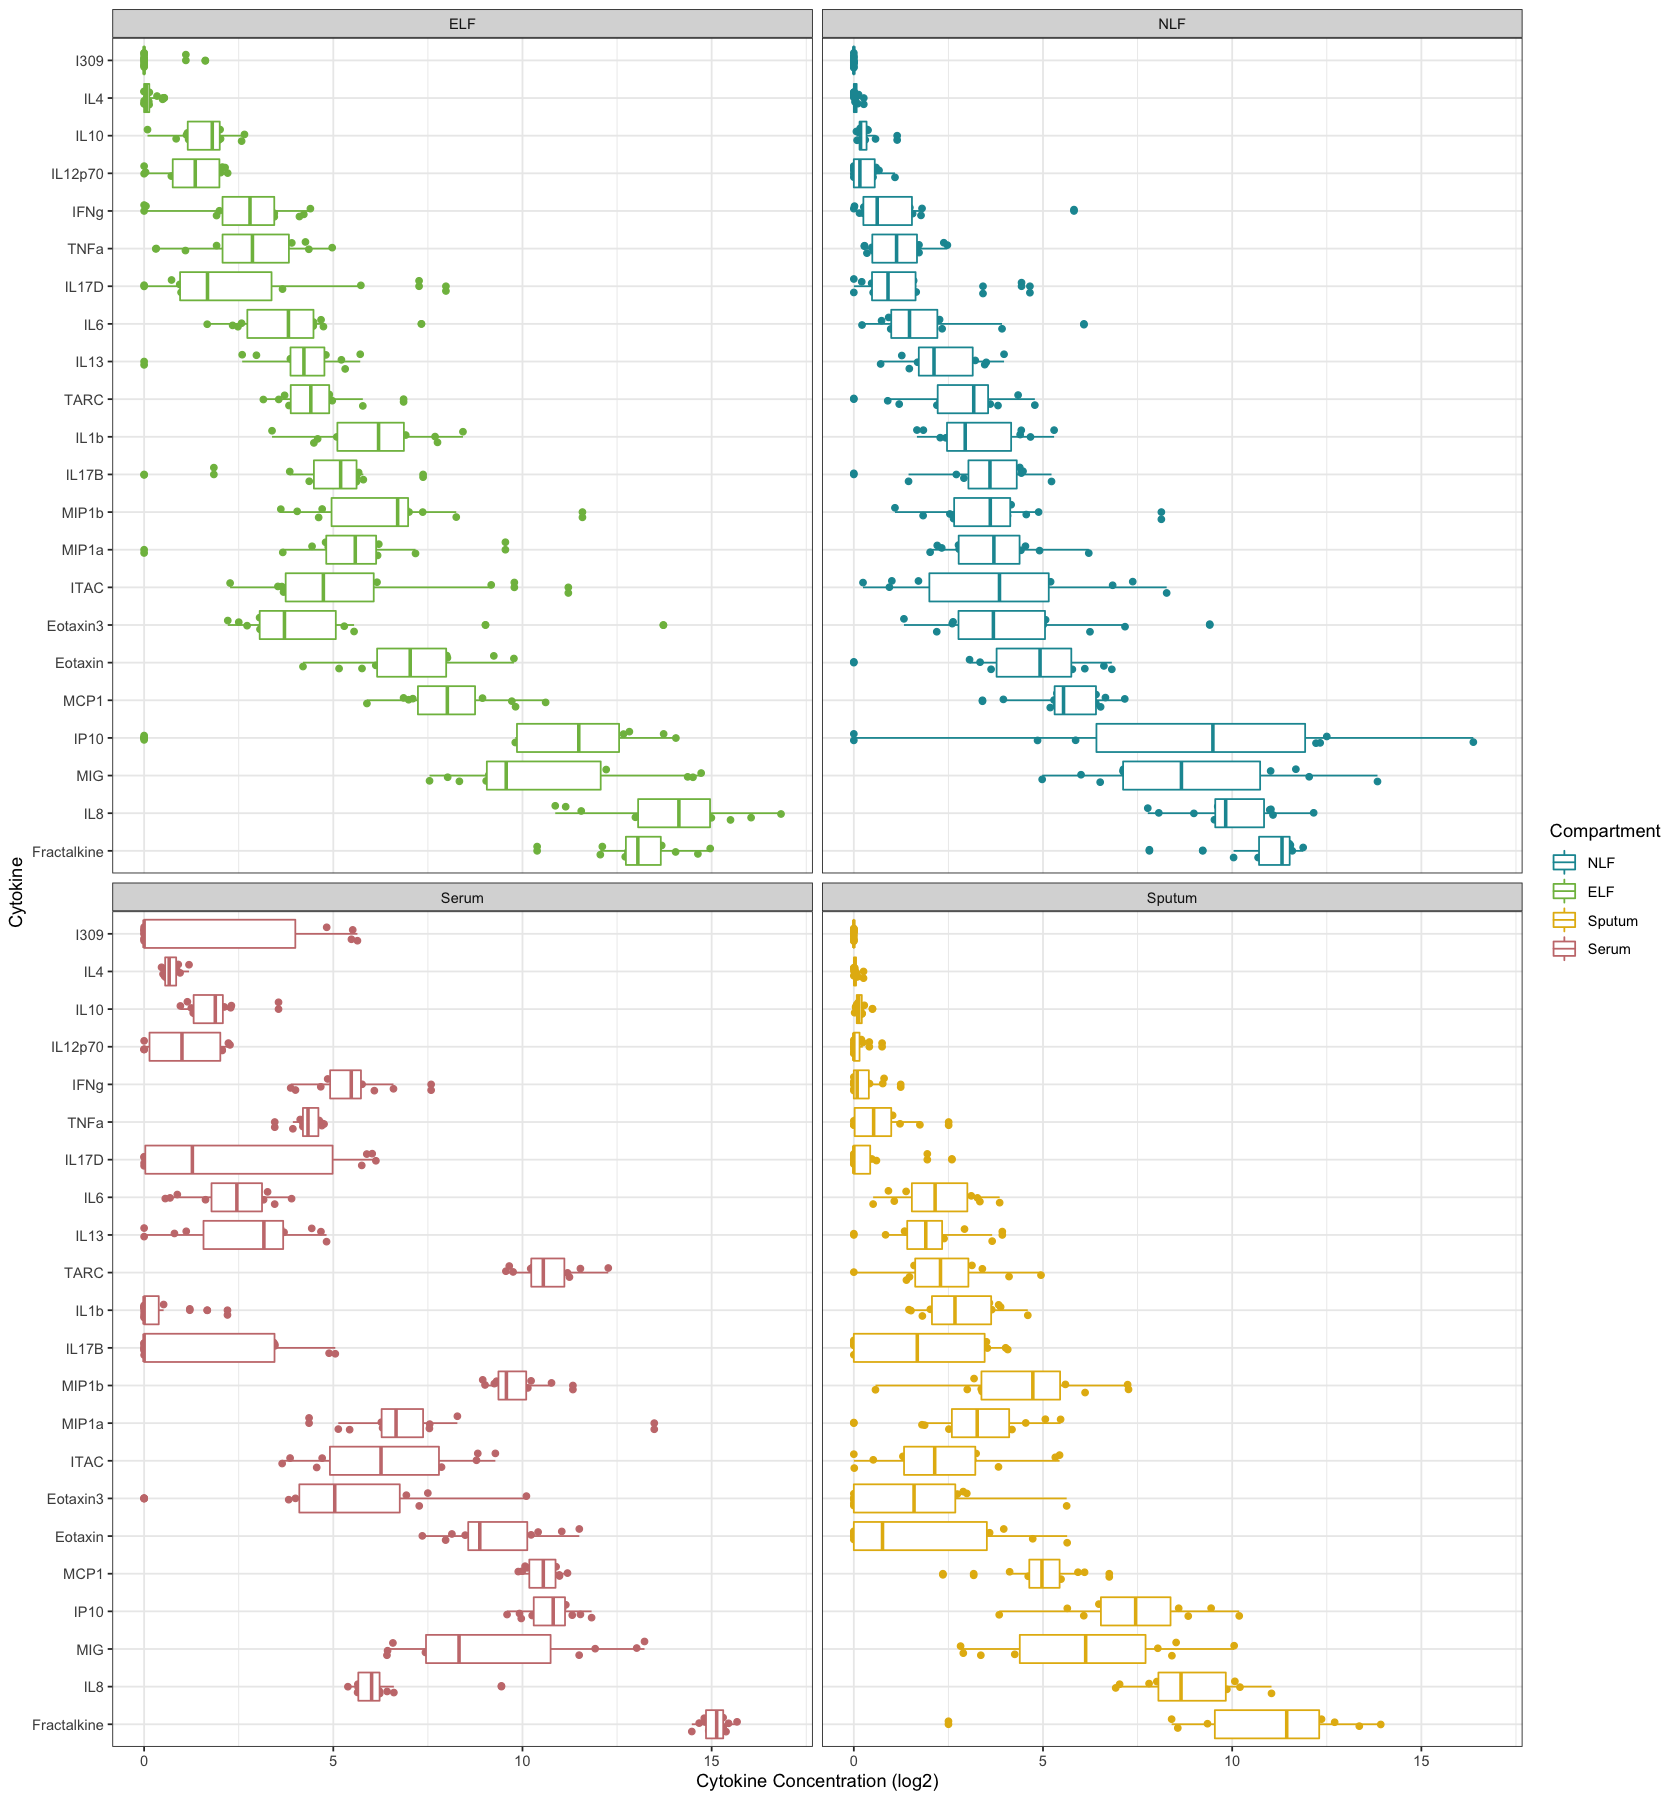

In [18]:
options(repr.plot.width=14, repr.plot.height=15) #changing size
descending_cytokines = row.names(NLF_df[order(-NLF_df$mean),])
cytokines = factor(baseline_df1a$Protein, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 
ggplot(data = baseline_df1a, aes(x = Conc_pslog2, y = cytokines, color = Compartment)) + 
  geom_point(position = position_jitter(h = 0.2, w = 0)) +
  geom_boxplot() + 
  facet_wrap(~Compartment) +

  theme_bw() +
  ylab('Cytokine') + xlab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c'),
                      breaks = c('NLF','ELF','Sputum','Serum'))  #reordering

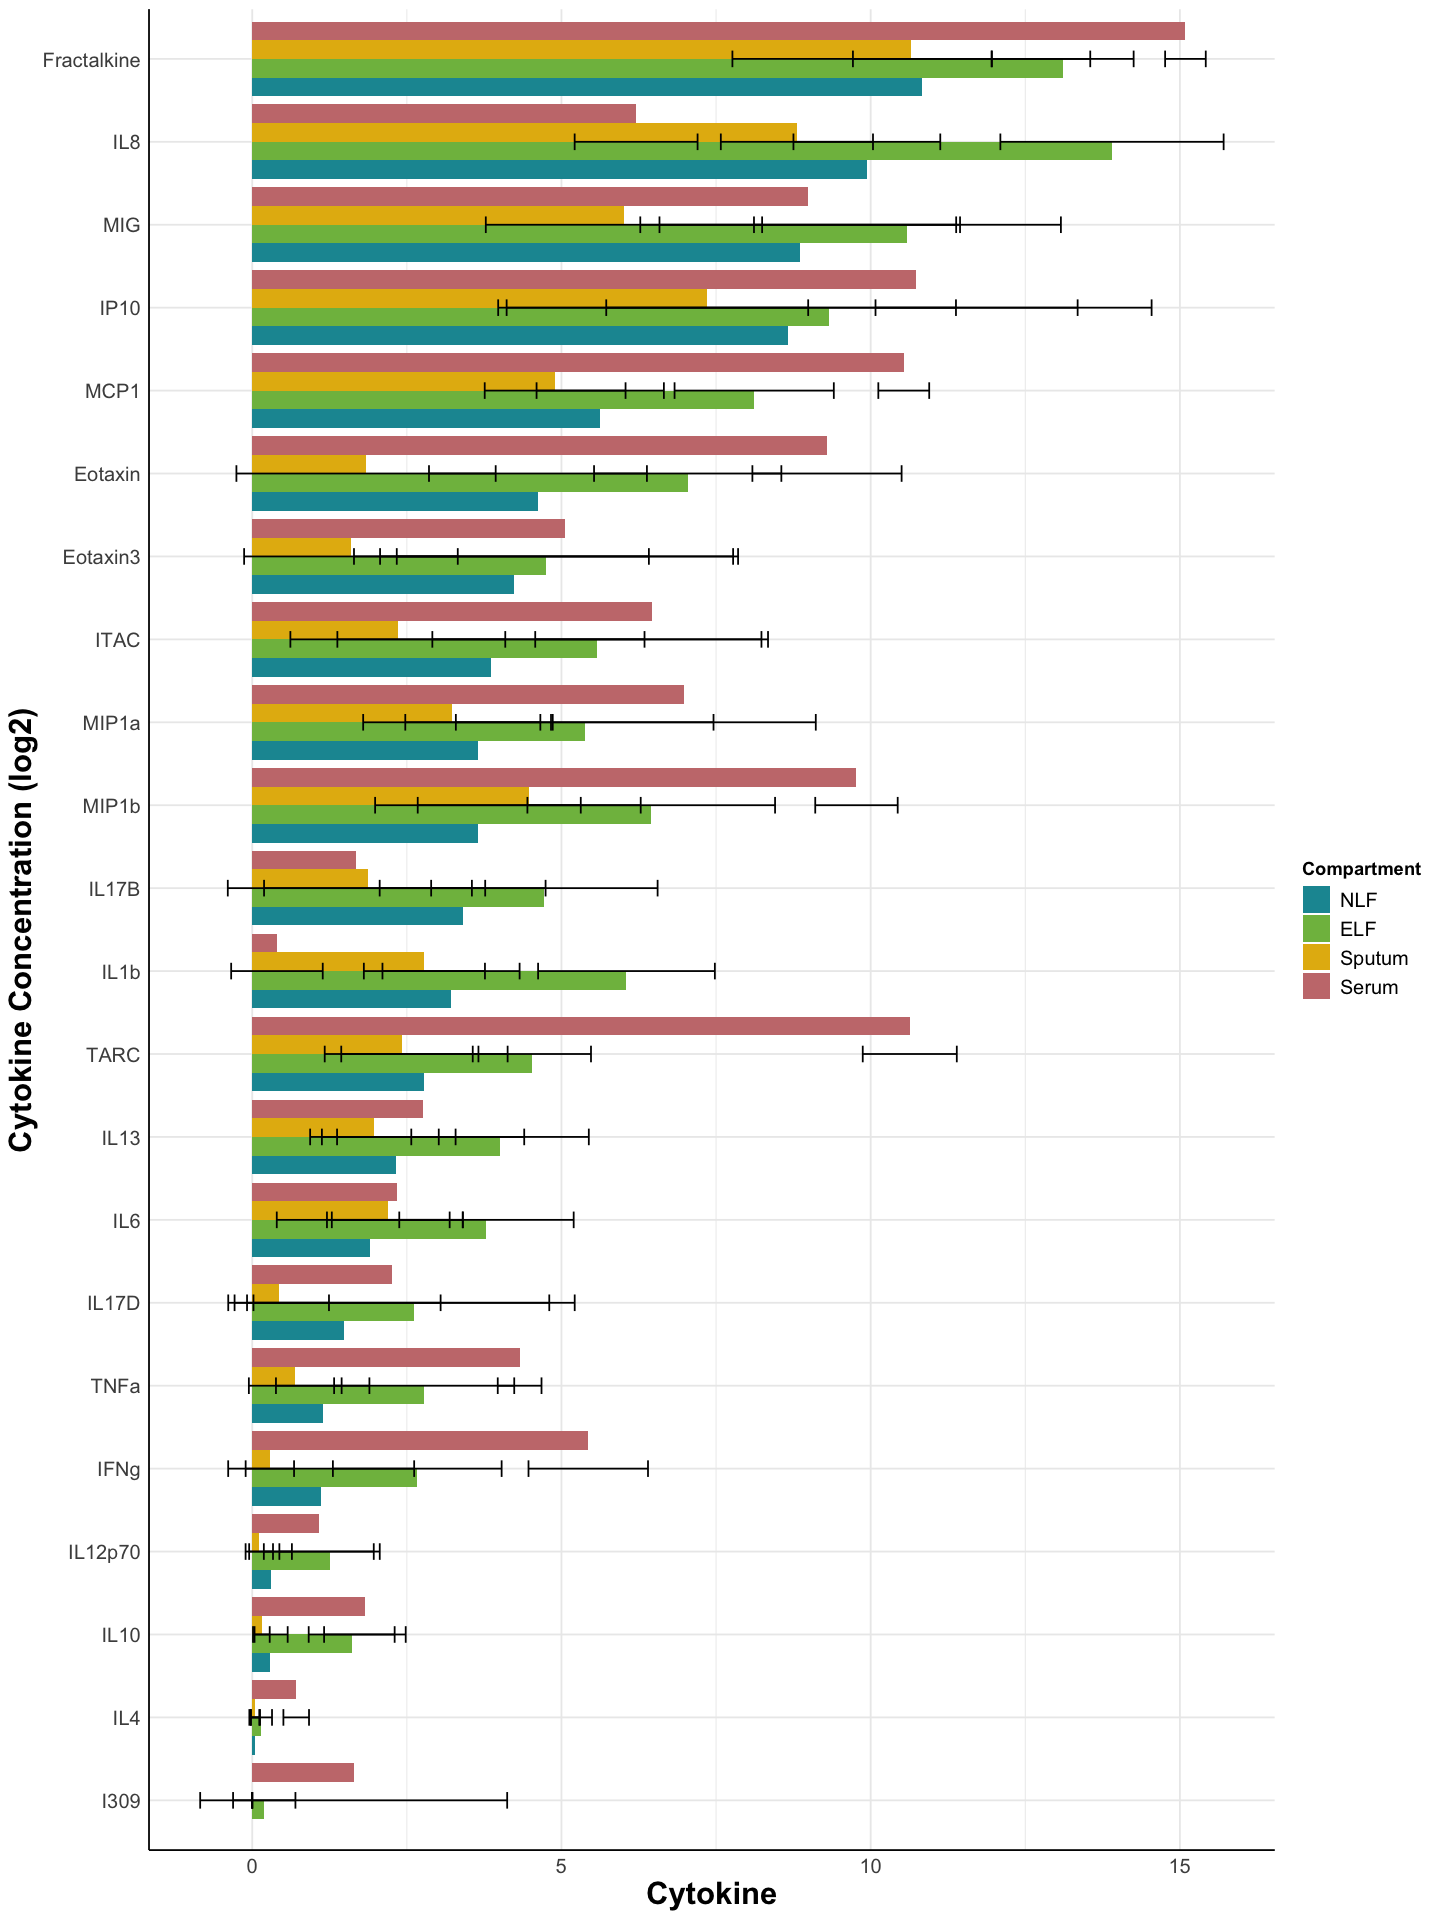

In [19]:
options(repr.plot.width=12, repr.plot.height=16) #changing size
descending_cytokines = row.names(NLF_df[order(NLF_df$mean),])
cytokines = factor(baseline_df$cytokine, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 
ggplot(transform(baseline_df, compartment = factor(compartment, levels = c('NLF','ELF','Sputum','Serum')))) +
  geom_col(aes(x = mean, y = cytokines, fill = compartment), position = 'dodge') + 
  geom_errorbar(aes(x = mean, y = cytokines,xmin = mean - sd,  xmax = mean + sd), 
                width = .2, position = 'dodge') + 

  theme_minimal() + 

  theme(#axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12),
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face="bold"),
        legend.text = element_text(size = 12))+ #changes legend title
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 

  labs(color = "Compartment") +#legend name
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c'),
                      breaks = c('NLF','ELF','Sputum','Serum')) + #reordering
  scale_fill_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c'),
                      breaks = c('NLF','ELF','Sputum','Serum'))  #reordering

# Shapiro-Wilk’s test (Table 2)

- Shapiro-Wilk's method to test for normality
- if p-value > 0.05, the distribution of the data are not significantly different from normal distribution; in other words, we can assume the normality if p>0.05

In [13]:
install.packages("dplyr") #for data manipulation
library('dplyr')

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
NLF_shapiro_test = shapiro.test(NLF_df$mean) 
ELF_shapiro_test = shapiro.test(ELF_df$mean) #normally distributed
Sputum_shapiro_test = shapiro.test(Sputum_df$mean) 
Serum_shapiro_test = shapiro.test(Serum_df$mean) #normally distributed

In [15]:
print(NLF_shapiro_test)
print(ELF_shapiro_test)
print(Sputum_shapiro_test)
print(Serum_shapiro_test)


	Shapiro-Wilk normality test

data:  NLF_df$mean
W = 0.88595, p-value = 0.01572


	Shapiro-Wilk normality test

data:  ELF_df$mean
W = 0.93898, p-value = 0.1886


	Shapiro-Wilk normality test

data:  Sputum_df$mean
W = 0.85281, p-value = 0.003808


	Shapiro-Wilk normality test

data:  Serum_df$mean
W = 0.92361, p-value = 0.09034



In [16]:
#running pearson correlation test on normally distributed data (ELF/Serum)
#ELF vs. all compartments
cor.test(ELF_df$mean, NLF_df$mean) #high correlation not by chance
cor.test(ELF_df$mean, Sputum_df$mean) #high correlation not by chance
cor.test(ELF_df$mean, Serum_df$mean) #fairly high correlation not by chance


	Pearson's product-moment correlation

data:  ELF_df$mean and NLF_df$mean
t = 20.783, df = 20, p-value = 5.184e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9458793 0.9908343
sample estimates:
      cor 
0.9776214 



	Pearson's product-moment correlation

data:  ELF_df$mean and Sputum_df$mean
t = 13.716, df = 20, p-value = 1.238e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8831244 0.9796615
sample estimates:
      cor 
0.9507409 



	Pearson's product-moment correlation

data:  ELF_df$mean and Serum_df$mean
t = 4.6467, df = 20, p-value = 0.0001555
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4293242 0.8760124
sample estimates:
      cor 
0.7205147 


In [17]:
#Serum vs. all compartment
cor.test(Serum_df$mean, NLF_df$mean) #fairly high correlation not by chance
cor.test(Serum_df$mean, Sputum_df$mean) #fairly high correlation not by chance


	Pearson's product-moment correlation

data:  Serum_df$mean and NLF_df$mean
t = 4.8708, df = 20, p-value = 9.255e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4568970 0.8837582
sample estimates:
      cor 
0.7366109 



	Pearson's product-moment correlation

data:  Serum_df$mean and Sputum_df$mean
t = 4.8638, df = 20, p-value = 9.405e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4560605 0.8835266
sample estimates:
      cor 
0.7361272 


# Spearman's Correlations

In [18]:
NLF_ELF_spearman = cor.test(NLF_df$mean, ELF_df$mean, method = c('spearman')) 
NLF_Sputum_spearman = cor.test(NLF_df$mean, Sputum_df$mean, method = c('spearman'))
NLF_Serum_spearman = cor.test(NLF_df$mean, Serum_df$mean, method = c('spearman'))
ELF_Sputum_spearman = cor.test(ELF_df$mean, Sputum_df$mean, method = c('spearman')) 
ELF_Serum_spearman = cor.test(ELF_df$mean, Serum_df$mean, method = c('spearman'))
Sputum_Serum_spearman = cor.test(Sputum_df$mean, Serum_df$mean, method = c('spearman'))

# extracting spearman coefficients 
NLF_ELF_spearman_coeff = NLF_ELF_spearman$estimate
NLF_Sputum_spearman_coeff = NLF_Sputum_spearman$estimate
NLF_Serum_spearman_coeff = NLF_Serum_spearman$estimate
ELF_Sputum_spearman_coeff = ELF_Sputum_spearman$estimate
ELF_Serum_spearman_coeff = ELF_Serum_spearman$estimate
Sputum_Serum_spearman_coeff = Sputum_Serum_spearman$estimate

# extracting p values
NLF_ELF_spearman_pvalue = NLF_ELF_spearman$p.value
NLF_Sputum_spearman_pvalue = NLF_Sputum_spearman$p.value
NLF_Serum_spearman_pvalue = NLF_Serum_spearman$p.value
ELF_Sputum_spearman_pvalue = ELF_Sputum_spearman$p.value
ELF_Serum_spearman_pvalue = ELF_Serum_spearman$p.value
Sputum_Serum_spearman_pvalue = Sputum_Serum_spearman$p.value

In [19]:
# creating table w/ comparisons as rows and 2 col: coeff and p value
spearman_coeff = c(NLF_ELF_spearman_coeff, NLF_Sputum_spearman_coeff, NLF_Serum_spearman_coeff,
                  ELF_Sputum_spearman_coeff, ELF_Serum_spearman_coeff, Sputum_Serum_spearman_coeff)
spearman_pvalue = c(NLF_ELF_spearman_pvalue, NLF_Sputum_spearman_pvalue, NLF_Serum_spearman_pvalue,
                  ELF_Sputum_spearman_pvalue, ELF_Serum_spearman_pvalue, Sputum_Serum_spearman_pvalue)

In [20]:
spearman_coeff_pvalue = cbind(spearman_coeff, spearman_pvalue)
colnames(spearman_coeff_pvalue) = c('Spearman Coefficient', 'P Value')
rownames(spearman_coeff_pvalue) = c('NLF_ELF', 'NLF_Sputum','NLF_Serum','ELF_Sputum','ELF_Serum','Sputum_Serum')

In [21]:
spearman_coeff_pvalue

,Spearman Coefficient,P Value
NLF_ELF,0.9683794,3.501975e-06
NLF_Sputum,0.8791643,2.472468e-06
NLF_Serum,0.7346132,1.507782e-04
ELF_Sputum,0.9232072,4.079671e-06
ELF_Serum,0.7165443,2.612617e-04
Sputum_Serum,0.7176736,2.528313e-04


Running Spearman correlations using vectors not averages.

In [2]:
NLF_vector_df = data_df %>%
    filter(Compartment == 'NLF', Group == 'NS') %>%
    select(Conc_pslog2)
ELF_vector_df = data_df %>%
    filter(Compartment == 'ELF', Group == 'NS') %>%
    select(Conc_pslog2)
Sputum_vector_df = data_df %>%
    filter(Compartment == 'Sputum', Group == 'NS') %>%
    select(Conc_pslog2)
Serum_vector_df = data_df %>%
    filter(Compartment == 'Serum', Group == 'NS') %>%
    select(Conc_pslog2)

In [9]:
NLF_ELF_spearman = cor.test(NLF_vector_df$Conc_pslog2, ELF_vector_df$Conc_pslog2, method = c('spearman')) 
NLF_Sputum_spearman = cor.test(NLF_vector_df$Conc_pslog2, Sputum_vector_df$Conc_pslog2, method = c('spearman'))
NLF_Serum_spearman = cor.test(NLF_vector_df$Conc_pslog2, Serum_vector_df$Conc_pslog2, method = c('spearman'))
ELF_Sputum_spearman = cor.test(ELF_vector_df$Conc_pslog2, Sputum_vector_df$Conc_pslog2, method = c('spearman')) 
ELF_Serum_spearman = cor.test(ELF_vector_df$Conc_pslog2, Serum_vector_df$Conc_pslog2, method = c('spearman'))
Sputum_Serum_spearman = cor.test(Sputum_vector_df$Conc_pslog2, Serum_vector_df$Conc_pslog2, method = c('spearman'))

# extracting spearman coefficients 
NLF_ELF_spearman_coeff = NLF_ELF_spearman$estimate
NLF_Sputum_spearman_coeff = NLF_Sputum_spearman$estimate
NLF_Serum_spearman_coeff = NLF_Serum_spearman$estimate
ELF_Sputum_spearman_coeff = ELF_Sputum_spearman$estimate
ELF_Serum_spearman_coeff = ELF_Serum_spearman$estimate
Sputum_Serum_spearman_coeff = Sputum_Serum_spearman$estimate

# extracting p values
NLF_ELF_spearman_pvalue = NLF_ELF_spearman$p.value
NLF_Sputum_spearman_pvalue = NLF_Sputum_spearman$p.value
NLF_Serum_spearman_pvalue = NLF_Serum_spearman$p.value
ELF_Sputum_spearman_pvalue = ELF_Sputum_spearman$p.value
ELF_Serum_spearman_pvalue = ELF_Serum_spearman$p.value
Sputum_Serum_spearman_pvalue = Sputum_Serum_spearman$p.value

Warning message in cor.test.default(NLF_vector_df$Conc_pslog2, ELF_vector_df$Conc_pslog2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(NLF_vector_df$Conc_pslog2, Sputum_vector_df$Conc_pslog2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(NLF_vector_df$Conc_pslog2, Serum_vector_df$Conc_pslog2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(ELF_vector_df$Conc_pslog2, Sputum_vector_df$Conc_pslog2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(ELF_vector_df$Conc_pslog2, Serum_vector_df$Conc_pslog2, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(Sputum_vector_df$Conc_pslog2, Serum_vector_df$Conc_pslog2, :
“Cannot compute exact p-value with ties”


In [10]:
# creating table w/ comparisons as rows and 2 col: coeff and p value
spearman_coeff = c(NLF_ELF_spearman_coeff, NLF_Sputum_spearman_coeff, NLF_Serum_spearman_coeff,
                  ELF_Sputum_spearman_coeff, ELF_Serum_spearman_coeff, Sputum_Serum_spearman_coeff)
spearman_pvalue = c(NLF_ELF_spearman_pvalue, NLF_Sputum_spearman_pvalue, NLF_Serum_spearman_pvalue,
                  ELF_Sputum_spearman_pvalue, ELF_Serum_spearman_pvalue, Sputum_Serum_spearman_pvalue)

In [11]:
spearman_coeff_pvalue = cbind(spearman_coeff, spearman_pvalue)
colnames(spearman_coeff_pvalue) = c('Spearman Coefficient', 'P Value')
rownames(spearman_coeff_pvalue) = c('NLF_ELF', 'NLF_Sputum','NLF_Serum','ELF_Sputum','ELF_Serum','Sputum_Serum')

In [12]:
spearman_coeff_pvalue

,Spearman Coefficient,P Value
NLF_ELF,0.1557506,6.162018e-03
NLF_Sputum,0.7250104,1.744348e-51
NLF_Serum,0.1707209,2.646605e-03
ELF_Sputum,0.1909907,7.535619e-04
ELF_Serum,0.2774422,7.546595e-07
Sputum_Serum,0.1158423,4.219391e-02


# Supplemental Median Figure

In [40]:
get_median_sd = function(conc_list){
    #"""
    #:param: takes list of concentration values
    #:output: a list of descriptive stats (median and sd)

    #"""
    median = median(conc_list)
    standard_deviation = sd(conc_list)
    
    median_sd_tuple = c(median,standard_deviation) #putting into a vector to return both
    return(median_sd_tuple)
}

#calling standard deviation function 
Eotaxin_median_sd_NLF = get_median_sd(Eotaxin_concentration_list_NLF)
Eotaxin3_median_sd_NLF = get_median_sd(Eotaxin3_concentration_list_NLF)
Fractalkine_median_sd_NLF = get_median_sd(Fractalkine_concentration_list_NLF)
I309_median_sd_NLF = get_median_sd(I309_concentration_list_NLF)
IFNg_median_sd_NLF = get_median_sd(IFNg_concentration_list_NLF)
IL10_median_sd_NLF = get_median_sd(IL10_concentration_list_NLF)
IL12p70_median_sd_NLF = get_median_sd(IL12p70_concentration_list_NLF)
IL13_median_sd_NLF = get_median_sd(IL13_concentration_list_NLF)
IL17B_median_sd_NLF = get_median_sd(IL17B_concentration_list_NLF)
IL17D_median_sd_NLF = get_median_sd(IL17D_concentration_list_NLF)
IL1b_median_sd_NLF = get_median_sd(IL1b_concentration_list_NLF)
IL4_median_sd_NLF = get_median_sd(IL4_concentration_list_NLF)
IL6_median_sd_NLF = get_median_sd(IL6_concentration_list_NLF)
IL8_median_sd_NLF = get_median_sd(IL8_concentration_list_NLF)
IP10_median_sd_NLF = get_median_sd(IP10_concentration_list_NLF)
ITAC_median_sd_NLF = get_median_sd(ITAC_concentration_list_NLF)
MCP1_median_sd_NLF = get_median_sd(MCP1_concentration_list_NLF)
MIG_median_sd_NLF = get_median_sd(MIG_concentration_list_NLF)
MIP1a_median_sd_NLF = get_median_sd(MIP1a_concentration_list_NLF)
MIP1b_median_sd_NLF = get_median_sd(MIP1b_concentration_list_NLF)
TARC_median_sd_NLF = get_median_sd(TARC_concentration_list_NLF)
TNFa_median_sd_NLF = get_median_sd(TNFa_concentration_list_NLF)  

Eotaxin_median_sd_ELF = get_median_sd(Eotaxin_concentration_list_ELF)
Eotaxin3_median_sd_ELF = get_median_sd(Eotaxin3_concentration_list_ELF)
Fractalkine_median_sd_ELF = get_median_sd(Fractalkine_concentration_list_ELF)
I309_median_sd_ELF = get_median_sd(I309_concentration_list_ELF)
IFNg_median_sd_ELF = get_median_sd(IFNg_concentration_list_ELF)
IL10_median_sd_ELF = get_median_sd(IL10_concentration_list_ELF)
IL12p70_median_sd_ELF = get_median_sd(IL12p70_concentration_list_ELF)
IL13_median_sd_ELF = get_median_sd(IL13_concentration_list_ELF)
IL17B_median_sd_ELF = get_median_sd(IL17B_concentration_list_ELF)
IL17D_median_sd_ELF = get_median_sd(IL17D_concentration_list_ELF)
IL1b_median_sd_ELF = get_median_sd(IL1b_concentration_list_ELF)
IL4_median_sd_ELF = get_median_sd(IL4_concentration_list_ELF)
IL6_median_sd_ELF = get_median_sd(IL6_concentration_list_ELF)
IL8_median_sd_ELF = get_median_sd(IL8_concentration_list_ELF)
IP10_median_sd_ELF = get_median_sd(IP10_concentration_list_ELF)
ITAC_median_sd_ELF = get_median_sd(ITAC_concentration_list_ELF)
MCP1_median_sd_ELF = get_median_sd(MCP1_concentration_list_ELF)
MIG_median_sd_ELF = get_median_sd(MIG_concentration_list_ELF)
MIP1a_median_sd_ELF = get_median_sd(MIP1a_concentration_list_ELF)
MIP1b_median_sd_ELF = get_median_sd(MIP1b_concentration_list_ELF)
TARC_median_sd_ELF = get_median_sd(TARC_concentration_list_ELF)
TNFa_median_sd_ELF = get_median_sd(TNFa_concentration_list_ELF)  

Eotaxin_median_sd_Sputum = get_median_sd(Eotaxin_concentration_list_Sputum)
Eotaxin3_median_sd_Sputum = get_median_sd(Eotaxin3_concentration_list_Sputum)
Fractalkine_median_sd_Sputum = get_median_sd(Fractalkine_concentration_list_Sputum)
I309_median_sd_Sputum = get_median_sd(I309_concentration_list_Sputum)
IFNg_median_sd_Sputum = get_median_sd(IFNg_concentration_list_Sputum)
IL10_median_sd_Sputum = get_median_sd(IL10_concentration_list_Sputum)
IL12p70_median_sd_Sputum = get_median_sd(IL12p70_concentration_list_Sputum)
IL13_median_sd_Sputum = get_median_sd(IL13_concentration_list_Sputum)
IL17B_median_sd_Sputum = get_median_sd(IL17B_concentration_list_Sputum)
IL17D_median_sd_Sputum = get_median_sd(IL17D_concentration_list_Sputum)
IL1b_median_sd_Sputum = get_median_sd(IL1b_concentration_list_Sputum)
IL4_median_sd_Sputum = get_median_sd(IL4_concentration_list_Sputum)
IL6_median_sd_Sputum = get_median_sd(IL6_concentration_list_Sputum)
IL8_median_sd_Sputum = get_median_sd(IL8_concentration_list_Sputum)
IP10_median_sd_Sputum = get_median_sd(IP10_concentration_list_Sputum)
ITAC_median_sd_Sputum = get_median_sd(ITAC_concentration_list_Sputum)
MCP1_median_sd_Sputum = get_median_sd(MCP1_concentration_list_Sputum)
MIG_median_sd_Sputum = get_median_sd(MIG_concentration_list_Sputum)
MIP1a_median_sd_Sputum = get_median_sd(MIP1a_concentration_list_Sputum)
MIP1b_median_sd_Sputum = get_median_sd(MIP1b_concentration_list_Sputum)
TARC_median_sd_Sputum = get_median_sd(TARC_concentration_list_Sputum)
TNFa_median_sd_Sputum = get_median_sd(TNFa_concentration_list_Sputum)  

Eotaxin_median_sd_Serum = get_median_sd(Eotaxin_concentration_list_Serum)
Eotaxin3_median_sd_Serum = get_median_sd(Eotaxin3_concentration_list_Serum)
Fractalkine_median_sd_Serum = get_median_sd(Fractalkine_concentration_list_Serum)
I309_median_sd_Serum = get_median_sd(I309_concentration_list_Serum)
IFNg_median_sd_Serum = get_median_sd(IFNg_concentration_list_Serum)
IL10_median_sd_Serum = get_median_sd(IL10_concentration_list_Serum)
IL12p70_median_sd_Serum = get_median_sd(IL12p70_concentration_list_Serum)
IL13_median_sd_Serum = get_median_sd(IL13_concentration_list_Serum)
IL17B_median_sd_Serum = get_median_sd(IL17B_concentration_list_Serum)
IL17D_median_sd_Serum = get_median_sd(IL17D_concentration_list_Serum)
IL1b_median_sd_Serum = get_median_sd(IL1b_concentration_list_Serum)
IL4_median_sd_Serum = get_median_sd(IL4_concentration_list_Serum)
IL6_median_sd_Serum = get_median_sd(IL6_concentration_list_Serum)
IL8_median_sd_Serum = get_median_sd(IL8_concentration_list_Serum)
IP10_median_sd_Serum = get_median_sd(IP10_concentration_list_Serum)
ITAC_median_sd_Serum = get_median_sd(ITAC_concentration_list_Serum)
MCP1_median_sd_Serum = get_median_sd(MCP1_concentration_list_Serum)
MIG_median_sd_Serum = get_median_sd(MIG_concentration_list_Serum)
MIP1a_median_sd_Serum = get_median_sd(MIP1a_concentration_list_Serum)
MIP1b_median_sd_Serum = get_median_sd(MIP1b_concentration_list_Serum)
TARC_median_sd_Serum = get_median_sd(TARC_concentration_list_Serum)
TNFa_median_sd_Serum = get_median_sd(TNFa_concentration_list_Serum)  

In [41]:
get_dataframe = function(Eotaxin_tuple, Eotaxin3_tuple, Fractalkine_tuple, I309_tuple, IFNg_tuple,IL10_tuple, 
                         IL12p70_tuple,IL13_tuple, IL17B_tuple, IL17D_tuple, IL1b_tuple,IL4_tuple, IL6_tuple, 
                         IL8_tuple, IP10_tuple, ITAC_tuple, MCP1_tuple,MIG_tuple, MIP1a_tuple, 
                         MIP1b_tuple, TARC_tuple, TNFa_tuple){
   #"""
    #Putting median,sd tuples into a data frame based on compartment.

    #:param: 22 tuples from each cytokine
    #:output: a 22x2 data frame containing median and sd for each cytokine. 
    #"""
    matrix_median_sd_initial = cbind(Eotaxin_tuple, Eotaxin3_tuple, Fractalkine_tuple, I309_tuple, IFNg_tuple,
                          IL10_tuple, IL12p70_tuple,IL13_tuple, IL17B_tuple, IL17D_tuple, IL1b_tuple,
                          IL4_tuple, IL6_tuple, IL8_tuple, IP10_tuple, ITAC_tuple, MCP1_tuple,
                          MIG_tuple, MIP1a_tuple, MIP1b_tuple, TARC_tuple, TNFa_tuple)
    matrix_median_sd = t(matrix_median_sd_initial)
    rownames(matrix_median_sd) = c('Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa')
    colnames(matrix_median_sd) = c('median', 'sd')

    median_sd_df = data.frame(matrix_median_sd)
    #descending_median_sd_df = median_sd_df[order(-median_sd_df$median),]
    return(median_sd_df)
}
NLF_cytokines = get_dataframe(Eotaxin_median_sd_NLF, Eotaxin3_median_sd_NLF, Fractalkine_median_sd_NLF, I309_median_sd_NLF, 
                              IFNg_median_sd_NLF,IL10_median_sd_NLF, IL12p70_median_sd_NLF,IL13_median_sd_NLF, 
                              IL17B_median_sd_NLF, IL17D_median_sd_NLF, IL1b_median_sd_NLF,IL4_median_sd_NLF, 
                              IL6_median_sd_NLF, IL8_median_sd_NLF, IP10_median_sd_NLF, ITAC_median_sd_NLF, 
                              MCP1_median_sd_NLF,MIG_median_sd_NLF, MIP1a_median_sd_NLF, MIP1b_median_sd_NLF, 
                              TARC_median_sd_NLF, TNFa_median_sd_NLF)
ELF_cytokines = get_dataframe(Eotaxin_median_sd_ELF, Eotaxin3_median_sd_ELF, Fractalkine_median_sd_ELF, I309_median_sd_ELF, 
                              IFNg_median_sd_ELF,IL10_median_sd_ELF, IL12p70_median_sd_ELF,IL13_median_sd_ELF, 
                              IL17B_median_sd_ELF, IL17D_median_sd_ELF, IL1b_median_sd_ELF,IL4_median_sd_ELF, 
                              IL6_median_sd_ELF, IL8_median_sd_ELF, IP10_median_sd_ELF, ITAC_median_sd_ELF, 
                              MCP1_median_sd_ELF,MIG_median_sd_ELF, MIP1a_median_sd_ELF, MIP1b_median_sd_ELF, 
                              TARC_median_sd_ELF, TNFa_median_sd_ELF)
Sputum_cytokines = get_dataframe(Eotaxin_median_sd_Sputum, Eotaxin3_median_sd_Sputum, Fractalkine_median_sd_Sputum, I309_median_sd_Sputum, 
                              IFNg_median_sd_Sputum,IL10_median_sd_Sputum, IL12p70_median_sd_Sputum,IL13_median_sd_Sputum, 
                              IL17B_median_sd_Sputum, IL17D_median_sd_Sputum, IL1b_median_sd_Sputum,IL4_median_sd_Sputum, 
                              IL6_median_sd_Sputum, IL8_median_sd_Sputum, IP10_median_sd_Sputum, ITAC_median_sd_Sputum, 
                              MCP1_median_sd_Sputum,MIG_median_sd_Sputum, MIP1a_median_sd_Sputum, MIP1b_median_sd_Sputum, 
                              TARC_median_sd_Sputum, TNFa_median_sd_Sputum)
Serum_cytokines = get_dataframe(Eotaxin_median_sd_Serum, Eotaxin3_median_sd_Serum, Fractalkine_median_sd_Serum, I309_median_sd_Serum, 
                              IFNg_median_sd_Serum,IL10_median_sd_Serum, IL12p70_median_sd_Serum,IL13_median_sd_Serum, 
                              IL17B_median_sd_Serum, IL17D_median_sd_Serum, IL1b_median_sd_Serum,IL4_median_sd_Serum, 
                              IL6_median_sd_Serum, IL8_median_sd_Serum, IP10_median_sd_Serum, ITAC_median_sd_Serum, 
                              MCP1_median_sd_Serum,MIG_median_sd_Serum, MIP1a_median_sd_Serum, MIP1b_median_sd_Serum, 
                              TARC_median_sd_Serum, TNFa_median_sd_Serum)

In [42]:
add_compartment = function(dataframe, compartment_name){
    #"""
    #Takes the dataframes already made from above and adds a column specifying the compartment.

    #:param: compartment dataframe and compartment name
    #:output: a 22x3 matrix containing median, sd, and compartment for each cytokine. 
    #"""
    compartment = rep(compartment_name, times = length(dataframe$median))
    combined_df = cbind(dataframe,compartment)
    return(combined_df)
}
NLF_df = add_compartment(NLF_cytokines,'NLF')
ELF_df = add_compartment(ELF_cytokines, 'ELF')
Sputum_df = add_compartment(Sputum_cytokines, 'Sputum')
Serum_df = add_compartment(Serum_cytokines, 'Serum')

In [14]:
melted_median_df = function(dataframe){
    initial_melt = melt(dataframe, id = 'compartment')
    cytokines = rep(row.names(dataframe), times = 2)
    melted_compartment = cbind(initial_melt, cytokines)
    melted_compartment_median = melted_compartment[1:22,]
    return(melted_compartment_median)
}

melted_sd_df = function(dataframe){
    initial_melt = melt(dataframe, id = 'compartment')
    cytokines = rep(row.names(dataframe), times = 2)
    melted_compartment = cbind(initial_melt, cytokines)
    melted_compartment_sd = melted_compartment[23:44,]
    return(melted_compartment_sd)
}

median_melted_NLF = melted_median_df(NLF_df)
sd_melted_NLF = melted_sd_df(NLF_df)
median_melted_ELF = melted_median_df(ELF_df)
sd_melted_ELF = melted_sd_df(ELF_df)
median_melted_Sputum = melted_median_df(Sputum_df)
sd_melted_Sputum = melted_sd_df(Sputum_df)
median_melted_Serum = melted_median_df(Serum_df)
sd_melted_Serum = melted_sd_df(Serum_df)

In [43]:
#making one df of all melted baseline values
baseline_df_median = data.frame(cbind(c(NLF_df[,1],ELF_df[,1],Sputum_df[,1],Serum_df[,1]), c(NLF_df[,2],ELF_df[,2],Sputum_df[,2],Serum_df[,2]),c(NLF_df[,3],ELF_df[,3],Sputum_df[,3],Serum_df[,3]), c('Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa', 'Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa','Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa','Eotaxin','Eotaxin3','Fractalkine','I309','IFNg','IL10','IL12p70','IL13','IL17B',
                                'IL17D','IL1b','IL4','IL6','IL8','IP10','ITAC','MCP1','MIG','MIP1a','MIP1b',
                                 'TARC','TNFa')))
colnames(baseline_df_median) = c('median','sd','compartment','cytokine')
baseline_df_median$median = as.numeric(baseline_df_median$median)
baseline_df_median$sd = as.numeric(baseline_df_median$sd)

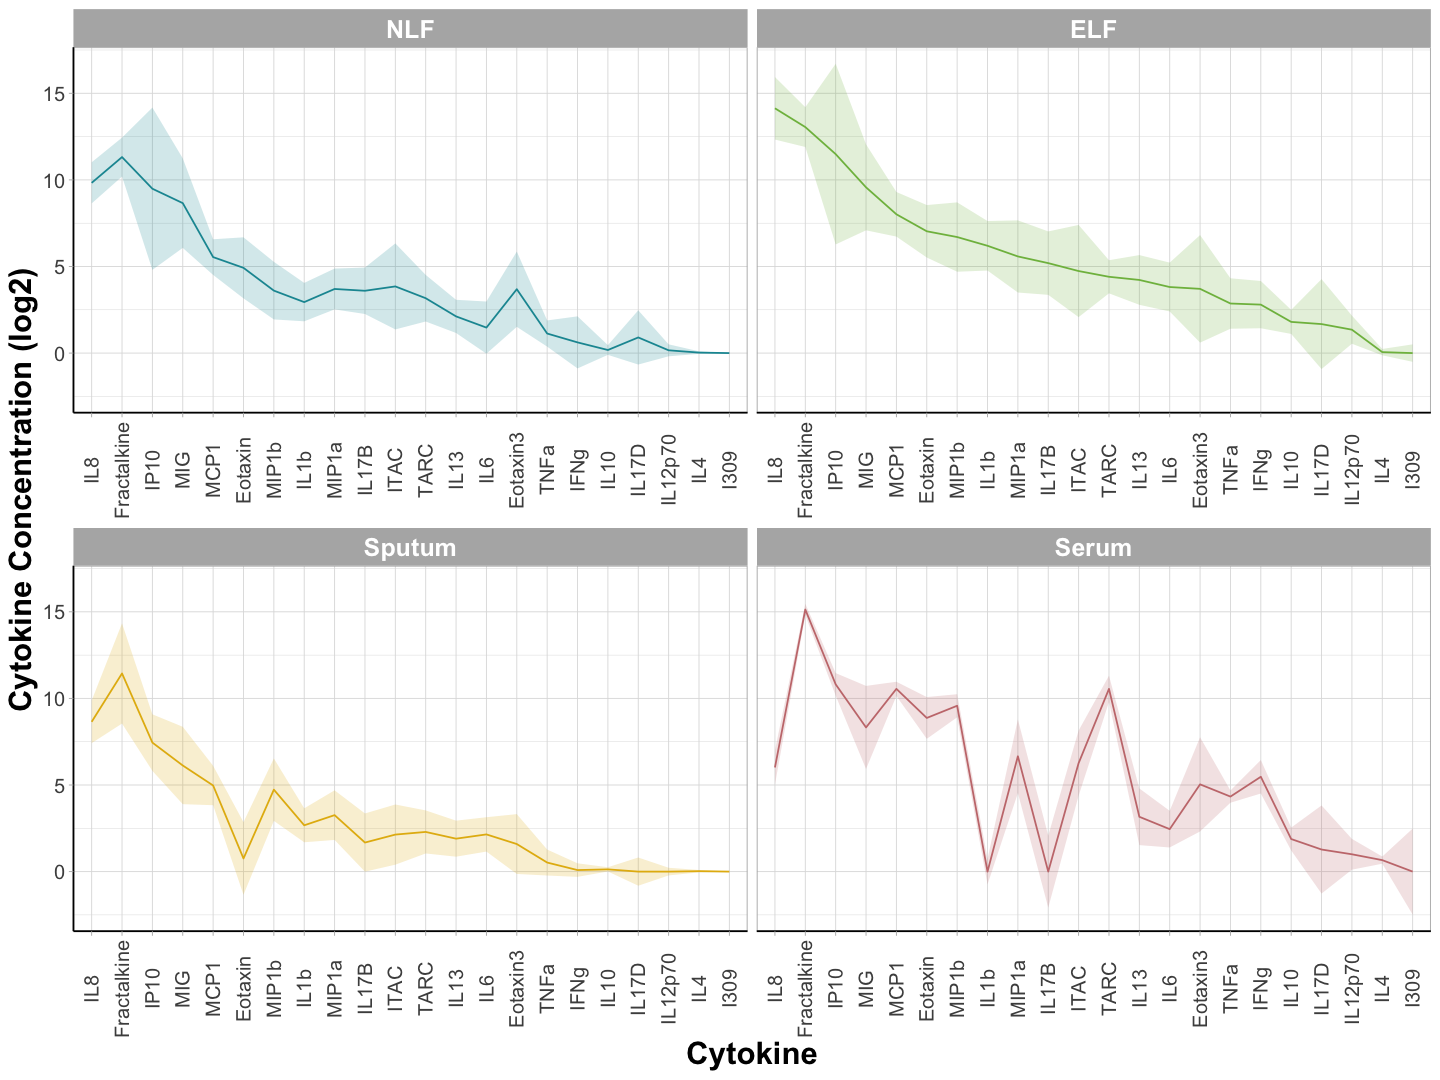

In [46]:
options(repr.plot.width=12, repr.plot.height=9) #changing size
descending_cytokines = row.names(NLF_df[order(-ELF_df$median),])
cytokines = factor(baseline_df_median$cytokine, levels = descending_cytokines) #need to put descending_cytokines into a factor for plotting 

supplemtental_median_figure = ggplot(transform(baseline_df_median, compartment = factor(compartment, levels = c('NLF','ELF','Sputum','Serum')))) + 
  geom_line(aes(x = cytokines, y = as.numeric(median), group = 1,color = compartment)) +
  geom_ribbon(aes(x = cytokines, y = median, ymin = median - sd, ymax = median + sd, group = 1, fill = compartment), alpha = 0.2) +
  
  facet_wrap(~ compartment, scales = 'free_x') + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        #legend.title = element_text(face = 'bold', size = 15), #changes legend title
        legend.position = "none", #removing legend
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 
  scale_color_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) +
  scale_fill_manual(name = 'Compartment',
                      values = c('#1896A1','#7fbb4d','#E4B710','#c87b7c')) 
supplemtental_median_figure

In [45]:
ggsave(supplemtental_median_figure, 
       filename = 'FigureS1.pdf',
       path = Output,
       width = 12, height = 9)

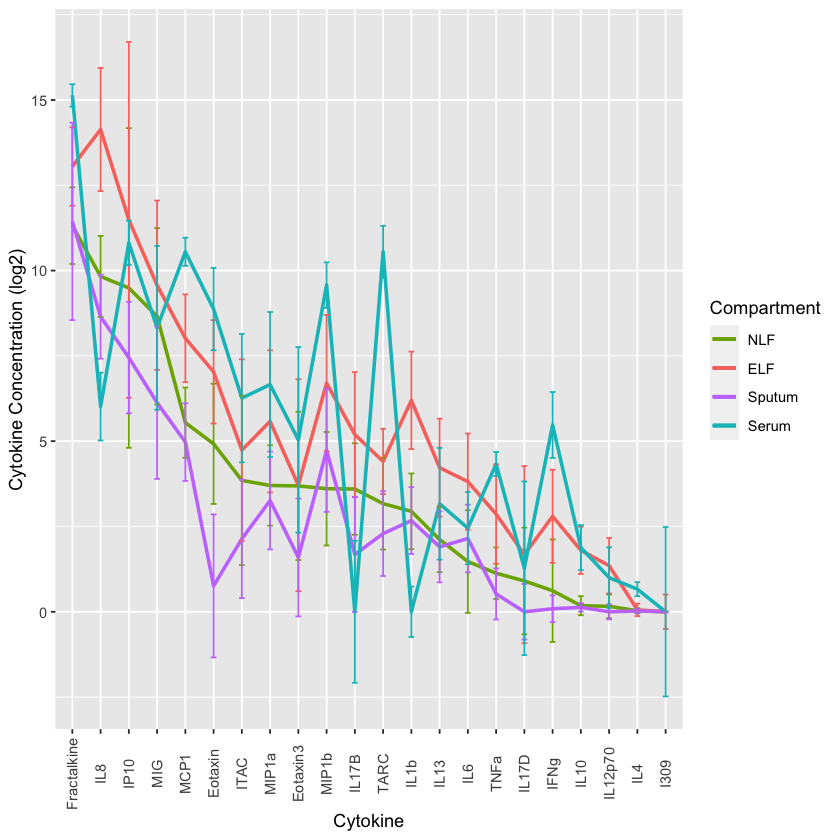

In [15]:
cytokines = row.names(NLF_df)
ggplot() +
  geom_line(data = NLF_df, aes(x = reorder(cytokines, -median), y = median, group = 1, color = compartment), size = 1) +
  geom_line(data = ELF_df, aes(x = reorder(cytokines, -median), y = median, group = 2, color = compartment), size = 1) +
  geom_line(data = Sputum_df, aes(x = reorder(cytokines, -median), y = median, group = 3, color = compartment), size = 1) +
  geom_line(data = Serum_df, aes(x = reorder(cytokines, -median), y = median, group = 4, color = compartment), size = 1) +
 
  #adding error bars
  geom_errorbar(data = NLF_df, aes(x = reorder(cytokines, -median), y = median, ymin = median - sd, ymax = median + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = ELF_df, aes(x = reorder(cytokines, -median), y = median, ymin = median - sd, ymax = median + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = Sputum_df, aes(x = reorder(cytokines, -median), y = median, ymin = median - sd, ymax = median + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +
  geom_errorbar(data = Serum_df, aes(x = reorder(cytokines, -median), y = median, ymin = median - sd, ymax = median + sd, color = compartment), 
                width = .2, position = position_dodge(.9)) +

  theme(axis.text.x = element_text(angle = 90, vjust = 0.5))+ #rotating x labels/ moving x labels slightly to the left
  xlab('Cytokine') + ylab('Cytokine Concentration (log2)') + #changing axis labels 

  labs(color = "Compartment") +#legend
  scale_color_discrete(name = 'Compartment',
                      breaks = c('NLF','ELF','Sputum','Serum'))  #reordering